## Black Friday Sales Prediction


## Problem Statement



A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

**Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.**

In [1]:
# Importing important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split

In [2]:
train =pd.read_csv(r"C:\Users\HP\Downloads\train_oSwQCTC.zip")
test = pd.read_csv(r"C:\Users\HP\Downloads\test_HujdGe7.zip")

In [3]:
# Combine the Data
combine = pd.concat([train,test],ignore_index=True)
print(train.shape)
print(test.shape)
print(combine.shape)

(550068, 12)
(233599, 11)
(783667, 12)


In [4]:
combine.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
# Lets check the Info of the Data
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
# Summary Statistics of the Data
combine.describe(include='all').T

# Observations:
# Product_ID-P00265242 is the most purchased product.
# Most of the transactions are done by males.
# People in the age bracket of 26-35 are purchasing more than the rest.
# People from City Category B are purchasing the most.
# The Purchase Variable has min of $12 and Max of 23961 dollars.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667.0,NaN,NaN,NaN,1003028.995753,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667.0,NaN,NaN,NaN,8.0793,6.522206,0.0,2.0,7.0,14.0,20.0
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667.0,NaN,NaN,NaN,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,NaN,NaN,NaN,5.366196,3.87816,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,NaN,NaN,NaN,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0


In [8]:
# Checking Missing value in the data
missing_value = combine.isnull().sum()
percentage = missing_value/combine.shape[0]
df = {'Missing_value':missing_value,'in %':percentage}
pd.DataFrame(df).sort_values(by='in %',ascending=False)

,Missing_value,in %
Product_Category_3,545809,0.696481
Product_Category_2,245982,0.313886
Purchase,233599,0.298085
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


## Exploratory Data Analysis

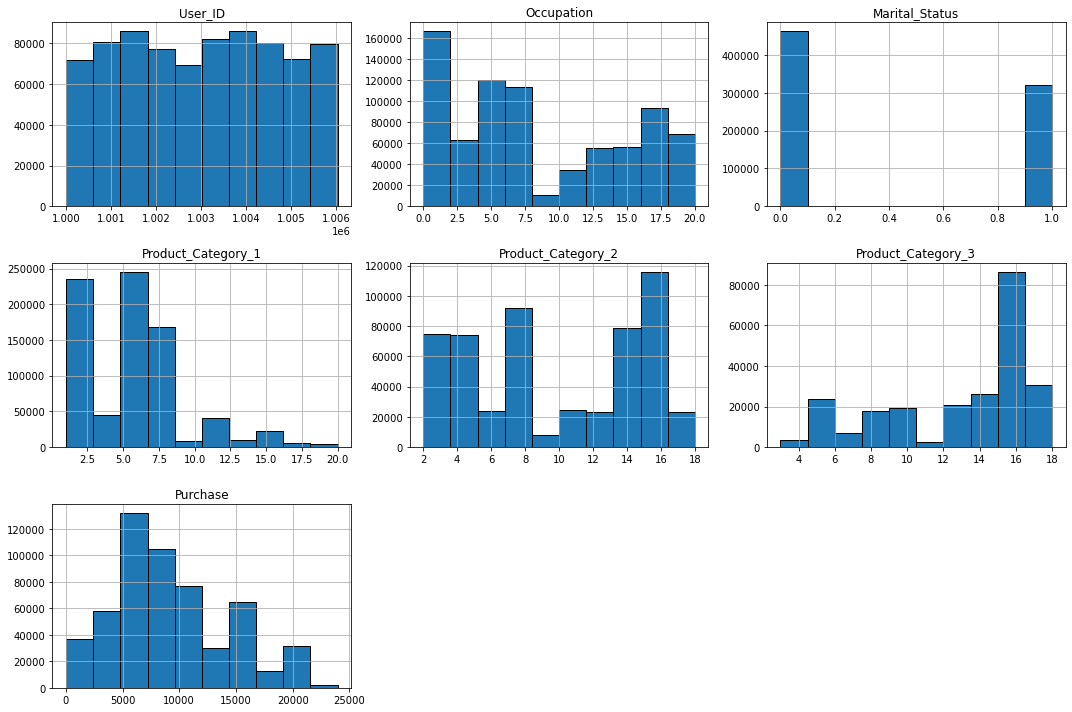

In [10]:
combine.hist(edgecolor="black", figsize = (15, 10))
plt.tight_layout()
plt.show()


# Observations:
# In product_category_3,16 is the most preferred product_cat.
# Purchase is positively skewed.
# In Product_Cat2, 16 and 8 appears to be the preferred ones.



In [13]:
print(combine.Product_Category_1.mode())
print(combine.Product_Category_2.mode())
print(combine.Product_Category_3.mode())

# Product category 5,8 and 16 are most preferred product.

0    5
Name: Product_Category_1, dtype: int64
0    8.0
Name: Product_Category_2, dtype: float64
0    16.0
Name: Product_Category_3, dtype: float64


In [20]:
combine.Marital_Status = combine.Marital_Status.astype(object)

In [17]:
# Split the data into numerical and categorical columns
cat = combine.select_dtypes(include='object').columns
num = combine.select_dtypes(include=np.number).columns


In [21]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  object 
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 71.7+ MB


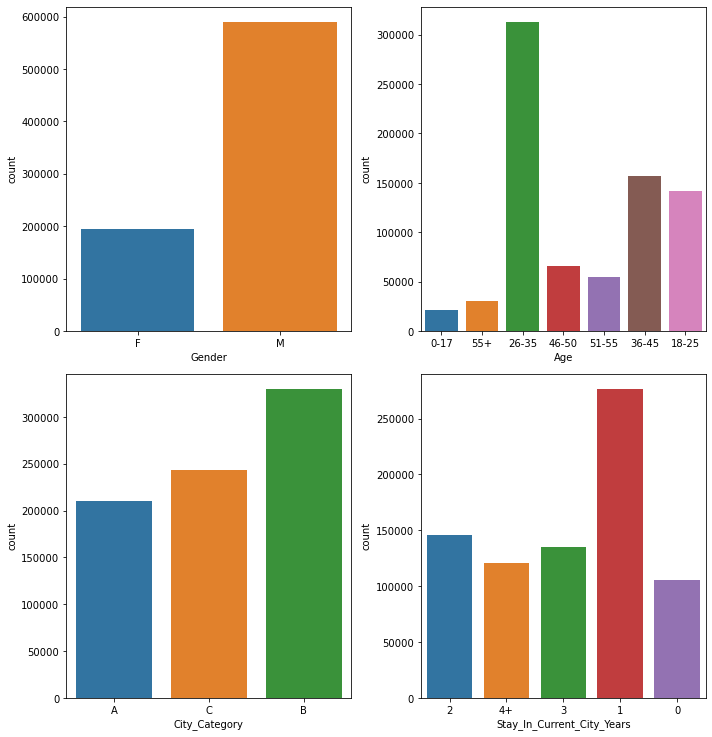

In [25]:
plt.figure(figsize=(10,15))
t=1
for i in cat[1:]:
    plt.subplot(3,2,t)
    sns.countplot(combine.loc[:,i])
    t=t+1
plt.tight_layout()
plt.show()

# Observations:
# Males are more in this data so it is clear that most of the purchases are done by Males.
# The most popular age bracket is 26-35 followed by 36-45.
# City Cat B then C followed by A in the descending order of Purchase.
# Most of them have stayed for min 1 year...

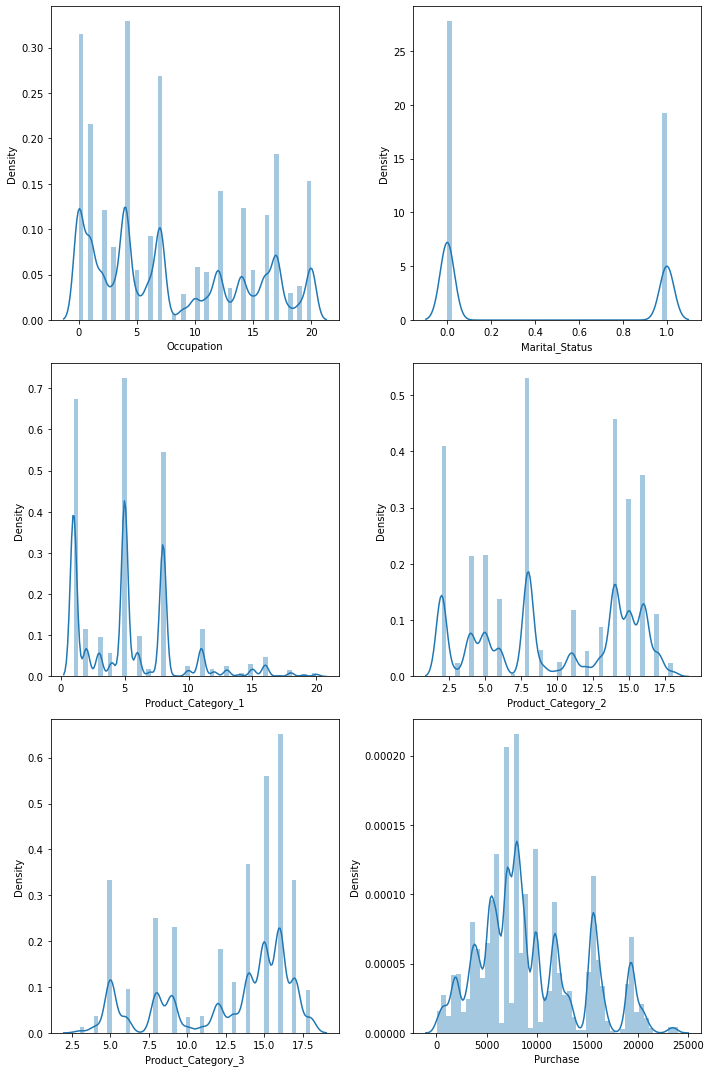

In [28]:
plt.figure(figsize=(10,15))
t=1
for i in num[1:]:
    plt.subplot(3,2,t)
    sns.distplot(combine.loc[:,i])
    t=t+1
plt.tight_layout()
plt.show()
    

In [45]:
# Remove Special Character from Stay and Age
combine.Age = combine.Age.str.strip('+')
combine.Stay_In_Current_City_Years = combine.Stay_In_Current_City_Years.str.strip('+').astype('float')

<AxesSubplot:xlabel='Age', ylabel='count'>

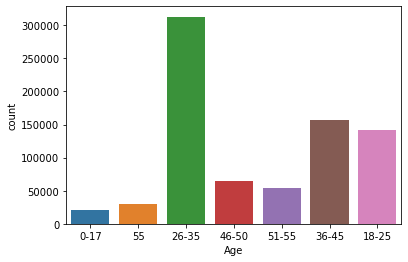

In [39]:
sns.countplot('Age',data=combine)

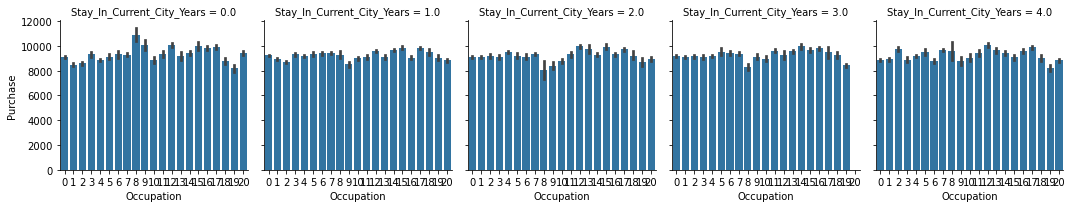

In [46]:
g = sns.FacetGrid(data=combine,col='Stay_In_Current_City_Years')
g.map(sns.barplot,'Occupation','Purchase')

# Observation: there is no effect on Purchase irrespective of the Marital Status, his stay in current city & Occupation.

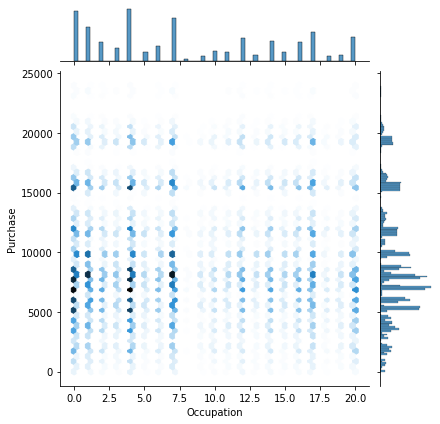

In [47]:
sns.jointplot(x = "Occupation", y = "Purchase", data = combine, kind = "hex")
plt.show()
# Observations:
# Most of the Purchases is between 5000-10000 range.
# The Occupation in the range 0-7 have the highest purchase
#  4 appears to be the profession where people make the most of the purchases.

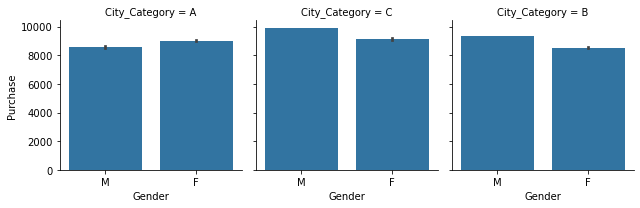

In [49]:
g = sns.FacetGrid(combine,col='City_Category')
g.map(sns.barplot,'Gender','Purchase')
plt.show()

# Observations:
# We see that City Category C has the highest no of Purchases Witnessed.
# For City Cat B & C, males tend to dominate the Purchase.
# Where as in City A, we see that females are the biggest spenders.

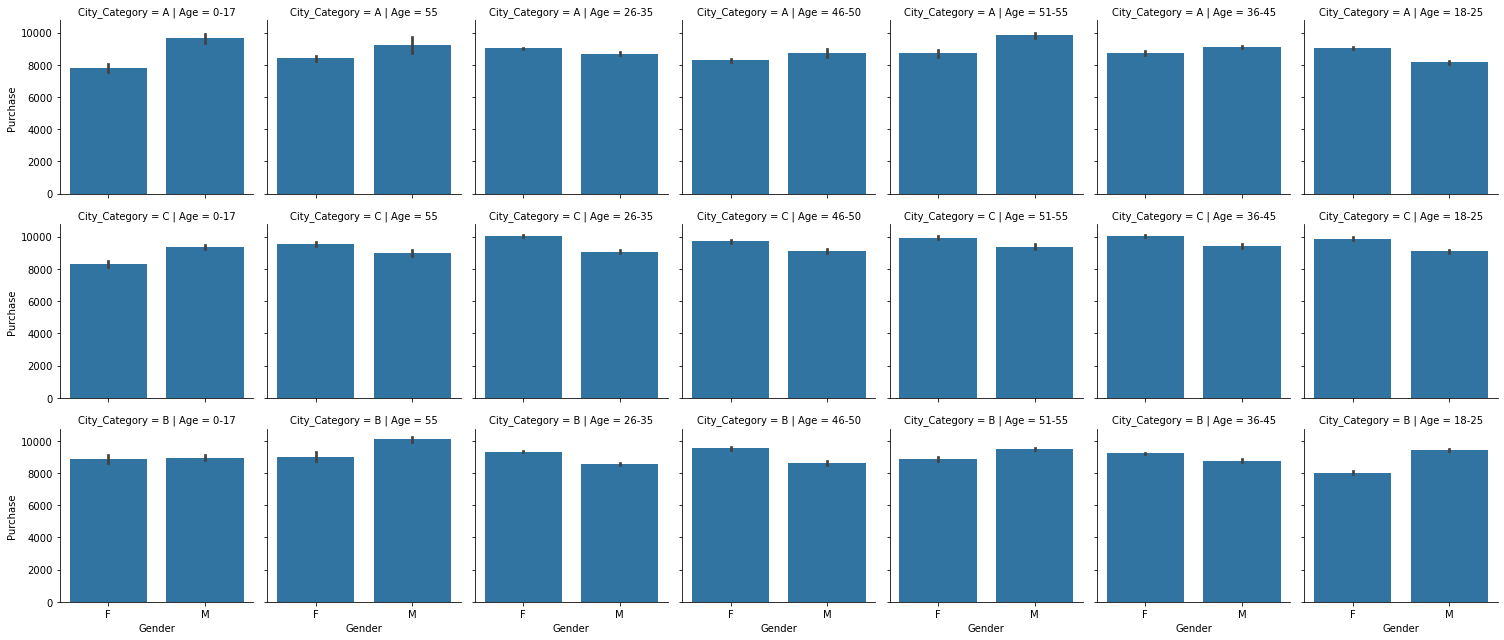

In [52]:
# Age, city category followed by Gender and Purchase.

g = sns.FacetGrid(combine, row = "City_Category", col = "Age") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y
plt.show()

# observations:
# There are two age groups in the City Cat_A 26-35 and 18-25 for which the females have made lot of purchases.
# We can say that Age Bracket 26-35 and 18-25 in A City are the potential buyers.

## Missing Value

In [53]:
combine.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [54]:
# Finding some Pattern
combine.groupby(['City_Category','Gender'])['Product_Category_2'].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        33582.0  10.124710  4.798571  2.0  6.0  11.0  14.0   
              M       106543.0   9.895713  5.092870  2.0  5.0   9.0  15.0   
B             F        55225.0   9.994006  4.853629  2.0  5.0  10.0  14.0   
              M       169990.0   9.768433  5.148369  2.0  5.0   9.0  15.0   
C             F        42014.0   9.923502  4.950752  2.0  5.0  10.0  14.0   
              M       130331.0   9.740852  5.215808  2.0  5.0   9.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [64]:
# Product_Category_2
combine.loc[(combine['City_Category']=='A') & (combine['Gender']=='F') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=11.0
combine.loc[(combine['City_Category']=='A') & (combine['Gender']=='M') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=9.0
combine.loc[(combine['City_Category']=='B') & (combine['Gender']=='F') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=10.0
combine.loc[(combine['City_Category']=='B') & (combine['Gender']=='M') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=9.0
combine.loc[(combine['City_Category']=='C') & (combine['Gender']=='F') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=10.0
combine.loc[(combine['City_Category']=='C') & (combine['Gender']=='M') & (combine['Product_Category_2'].isnull()),'Product_Category_2']=9.0

In [68]:
combine.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [66]:
combine.groupby(['City_Category','Gender'])['Product_Category_3'].describe()

count       mean       std  min  25%   50%   75%   max
City_Category Gender                                                          
A             F       13132.0  12.540512  4.060481  3.0  9.0  14.0  16.0  18.0
              M       46094.0  12.721070  4.106983  3.0  9.0  15.0  16.0  18.0
B             F       22364.0  12.494098  4.112220  3.0  9.0  14.0  16.0  18.0
              M       76261.0  12.715792  4.114596  3.0  9.0  15.0  16.0  18.0
C             F       18125.0  12.369876  4.187020  3.0  9.0  14.0  16.0  18.0
              M       61882.0  12.749119  4.146869  3.0  9.0  15.0  16.0  18.0

In [67]:
# Product_Category_3
combine.loc[(combine['City_Category']=='A') & (combine['Gender']=='F') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=14.0
combine.loc[(combine['City_Category']=='A') & (combine['Gender']=='M') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=15.0
combine.loc[(combine['City_Category']=='B') & (combine['Gender']=='F') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=14.0
combine.loc[(combine['City_Category']=='B') & (combine['Gender']=='M') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=15.0
combine.loc[(combine['City_Category']=='C') & (combine['Gender']=='F') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=14.0
combine.loc[(combine['City_Category']=='C') & (combine['Gender']=='M') & (combine['Product_Category_3'].isnull()),'Product_Category_3']=15.0

In [69]:
# Skewness
combine.skew()

User_ID                       0.003011
Occupation                    0.399767
Stay_In_Current_City_Years    0.318568
Marital_Status                0.366914
Product_Category_1            0.986594
Product_Category_2           -0.081216
Product_Category_3           -2.538785
Purchase                      0.600140
dtype: float64

### Feature Engineering:


In [75]:
prod = combine.Product_ID.value_counts().index[:10]

In [76]:
def Product(x):
    if x in prod:
        return('Top10')
    else:
        return('Others')
    

In [77]:
combine['Prod'] = combine.Product_ID.apply(Product)

<AxesSubplot:xlabel='Prod', ylabel='Purchase'>

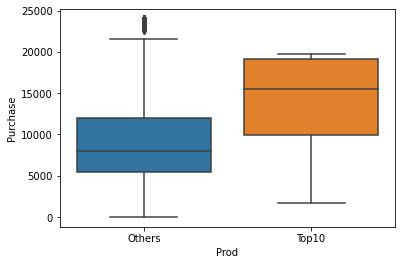

In [78]:
sns.boxplot(x = "Prod", y = "Purchase", data = combine)

In [80]:
## Dropping Unnecessary Columns
combine.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Prod'],
      dtype='object')

In [81]:
new = combine.drop(columns=['User_ID','Product_ID'])

In [82]:
new

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prod
0,F,0-17,10,A,2.0,0,3,11.0,14.0,8370.0,Others
1,F,0-17,10,A,2.0,0,1,6.0,14.0,15200.0,Others
2,F,0-17,10,A,2.0,0,12,11.0,14.0,1422.0,Others
3,F,0-17,10,A,2.0,0,12,14.0,14.0,1057.0,Others
4,M,55,16,C,4.0,0,8,9.0,15.0,7969.0,Others
...,...,...,...,...,...,...,...,...,...,...,...
783662,F,26-35,15,B,4.0,1,8,10.0,14.0,NaN,Others
783663,F,26-35,15,B,4.0,1,5,8.0,14.0,NaN,Others
783664,F,26-35,15,B,4.0,1,1,5.0,12.0,NaN,Others
783665,F,46-50,1,C,4.0,0,10,16.0,14.0,NaN,Others


In [83]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new["Age_Encoded"] = le.fit_transform(new.Age)

In [84]:
# Applying pd.get_dummies

dummydata = pd.get_dummies(new.drop("Age", axis=1), drop_first=True)

In [112]:
# [0:train.shape[0]-1]

In [90]:
# Split the Data in newtrain and newtest

newtrain = dummydata.loc[0:train.shape[0]-1, :]
newtest = dummydata.loc[train.shape[0]:, :]

print(newtrain.shape, newtest.shape)

(550068, 12) (233599, 12)


In [91]:
newtest = newtest.drop("Purchase", axis = 1)
X = newtrain.drop("Purchase", axis = 1)
y = newtrain.Purchase

### Modelling

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [105]:
# linear regression
lr = LinearRegression()
pred_lr = lr.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_lr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("LRMODEL-1.csv", index=False)   ## 4667.26

In [99]:
cd

C:\Users\HP


In [111]:
# XGBM
xgb_r = XGBRegressor()
pred_xgbr = xgb_r.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBMODEL-1.csv", index=False)  ##2862.98

In [117]:
#Ada
ada = AdaBoostRegressor()
pred_ada = ada.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_ada, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("ADAMODEL.csv", index=False) # 3862 